In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import os
import random
from datetime import datetime
import scipy
import seaborn as sns
import time

In [2]:
# Read all files in the directory
def read_file(in_folder, percent=1):
    i = 0
    # Random sampling
    all_files = os.listdir(in_folder)
    num_files = int(np.floor(len(all_files) * percent))
    chosen_files = random.sample(all_files, num_files)
    
    for file in chosen_files:
        file_name = in_folder + file
        print(file_name)
        if i == 0:
            df = pd.read_csv(file_name)
        else:
            temp_df = pd.read_csv(file_name)
            df = pd.concat([df, temp_df]).reset_index(drop=True)
        i +=1
    print('Number of files:',format(i))
    return df

In [3]:
# df_0 = read_file('data/', percent=0.04) # 16 files
df_0 = read_file('../../data/data/', percent=0.03) # 16 files

../../data/data/uk_obs_coordinates_000000000031
../../data/data/uk_obs_coordinates_000000000047
Number of files: 2


In [4]:
df_0.shape

(6121492, 6)

In [5]:
df_0['Level'].unique()

array(['2nd Floor'], dtype=object)

In [6]:
df_0.loc[df_0['Level'].isin(['1st Floor', '2nd Floor', '3rd Floor']),:]

Site      Level      ClientMacAddr        lat       lng  \
0        UK Office  2nd Floor  b4:9c:df:63:d2:20  51.460385 -0.933103   
1        UK Office  2nd Floor  90:61:ae:25:4e:b4  51.460346 -0.933074   
2        UK Office  2nd Floor  5c:5f:67:8b:f2:45  51.460395 -0.933125   
3        UK Office  2nd Floor  88:66:a5:56:80:a0  51.460344 -0.932660   
4        UK Office  2nd Floor  9c:da:3e:7f:a1:f2  51.460627 -0.932408   
...            ...        ...                ...        ...       ...   
6121487  UK Office  2nd Floor  14:ab:c5:09:b7:4e  51.460894 -0.932406   
6121488  UK Office  2nd Floor  5c:5f:67:8b:1c:67  51.460461 -0.932850   
6121489  UK Office  2nd Floor  98:10:e8:38:b8:8c  51.460485 -0.932868   
6121490  UK Office  2nd Floor  88:66:a5:10:a7:4e  51.460856 -0.932401   
6121491  UK Office  2nd Floor  40:98:ad:90:c3:d3  51.460463 -0.932835   

                           localtime  
0        2020-03-03 16:46:09.471 UTC  
1        2020-03-03 16:46:09.471 UTC  
2        2020-03-03 16:46:09.471 UTC  
3        2020-03-03 16:46:09.454 UTC  
4        2020-03-03 16:46:09.453 UTC  
...                              ...  
6121487  2019-10-22 10:48:45.536 UTC  
6121488  2019-10-22 10:48:45.536 UTC  
6121489  2019-10-22 10:48:45.536 UTC  
6121490  2019-10-22 10:48:45.536 UTC  
6121491  2019-10-22 10:48:45.536 UTC  

[6121492 rows x 6 columns]

### Data cleaning

In [7]:
## Clean data at 1st - 3rd floor 
df_1 = df_0.loc[df_0['Level'].isin(['Ground Floor', '1st Floor', '2nd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

df_2.reset_index(inplace=True)
df_2.tail()

# rows before cleaning: 6121492


index       Site      Level      ClientMacAddr        lat  \
2716326  6121475  UK Office  2nd Floor  90:61:ae:25:4b:2b  51.460511   
2716327  6121482  UK Office  2nd Floor  5c:5f:67:8b:29:f5  51.460394   
2716328  6121488  UK Office  2nd Floor  5c:5f:67:8b:1c:67  51.460461   
2716329  6121489  UK Office  2nd Floor  98:10:e8:38:b8:8c  51.460485   
2716330  6121491  UK Office  2nd Floor  40:98:ad:90:c3:d3  51.460463   

              lng                    localtime  
2716326 -0.932465  2019-10-22 10:48:45.638 UTC  
2716327 -0.932913  2019-10-22 10:48:45.635 UTC  
2716328 -0.932850  2019-10-22 10:48:45.536 UTC  
2716329 -0.932868  2019-10-22 10:48:45.536 UTC  
2716330 -0.932835  2019-10-22 10:48:45.536 UTC

In [8]:
# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.46055295640854 and lat<=51.460984859445034")
df_3 = df_3.query("lng>=-0.932590207567124 and lng<=-0.9322208241894918")
df_3.reset_index(inplace=True)
df_3.tail()
#df_1 = pd.concat([df_2, df_3], ignore_index=True)
#print("# rows after cleaning: {}".format(df_1.shape[0]))


index       Site      Level      ClientMacAddr        lat  \
2771844  6121484  UK Office  2nd Floor  5c:5f:67:8b:1c:bc  51.460820   
2771845  6121485  UK Office  2nd Floor  88:66:a5:2c:d0:ce  51.460886   
2771846  6121486  UK Office  2nd Floor  88:66:a5:0c:b4:83  51.460897   
2771847  6121487  UK Office  2nd Floor  14:ab:c5:09:b7:4e  51.460894   
2771848  6121490  UK Office  2nd Floor  88:66:a5:10:a7:4e  51.460856   

              lng                    localtime  
2771844 -0.932400  2019-10-22 10:48:45.536 UTC  
2771845 -0.932401  2019-10-22 10:48:45.536 UTC  
2771846 -0.932423  2019-10-22 10:48:45.536 UTC  
2771847 -0.932406  2019-10-22 10:48:45.536 UTC  
2771848 -0.932401  2019-10-22 10:48:45.536 UTC

In [9]:
#Merging df_2 and df_3
df_1 = pd.concat([df_2, df_3], ignore_index=True).drop_duplicates(subset=['index']).drop(columns=['index'])
print("# rows after cleaning: {}".format(df_1.shape[0]))
df_1.head(10)

# rows after cleaning: 5488180


Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  2nd Floor  b4:9c:df:63:d2:20  51.460385 -0.933103   
1  UK Office  2nd Floor  5c:5f:67:8b:f2:45  51.460395 -0.933125   
2  UK Office  2nd Floor  88:66:a5:1c:a2:d2  51.460529 -0.932410   
3  UK Office  2nd Floor  28:16:ad:17:e3:b9  51.460435 -0.932782   
4  UK Office  2nd Floor  a4:c3:f0:a5:f1:4f  51.460445 -0.932772   
5  UK Office  2nd Floor  cc:44:63:3c:40:8b  51.460422 -0.932742   
6  UK Office  2nd Floor  9c:da:3e:7f:a7:6f  51.460437 -0.932740   
7  UK Office  2nd Floor  88:66:a5:18:ae:26  51.460413 -0.932662   
8  UK Office  2nd Floor  5c:5f:67:8b:1c:6c  51.460438 -0.932801   
9  UK Office  2nd Floor  88:66:a5:15:0a:92  51.460400 -0.932854   

                     localtime  
0  2020-03-03 16:46:09.471 UTC  
1  2020-03-03 16:46:09.471 UTC  
2  2020-03-03 16:46:09.453 UTC  
3  2020-03-03 16:46:09.438 UTC  
4  2020-03-03 16:46:09.438 UTC  
5  2020-03-03 16:46:09.438 UTC  
6  2020-03-03 16:46:09.438 UTC  
7  2020-03-03 16:46:09.438 UTC  
8  2020-03-03 16:46:09.438 UTC  
9  2020-03-03 16:46:09.438 UTC

In [10]:
## Clean data at 4th floor 
df_4 = df_0.loc[df_0['Level']=='3rd Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 0
# rows after cleaning: 0


In [11]:
# Combined all filtered df
cleaned_df = pd.concat([df_1, df_4], ignore_index=True)
df = cleaned_df
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 5488180


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488180 entries, 0 to 5488179
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 251.2+ MB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## Add date time columns

In [13]:
# start_time = time.time()
# df['localtime'] = pd.to_datetime(df['localtime'])
# print("--- %s mins ---" % (int(time.time() - start_time)/60))

# start_time = time.time()
# df['date']  = df['localtime'].dt.date
# df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
# df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
# df["IsWeekend"] = df["dayOfWeek"] >= 5
# print("--- %s mins ---" % (int(time.time() - start_time)/60))

In [14]:
# df.head()

In [15]:
start_time = time.time()
df['localtime'] = df['localtime'].astype('datetime64[ns]')
print("--- %s mins ---" % (int(time.time() - start_time)/60))

start_time = time.time()
df['date']  = df['localtime'].dt.date
df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
print("--- %s mins ---" % (int(time.time() - start_time)/60))
# df['day']   = df['localtime'].dt.day

--- 2.0 mins ---
--- 0.36666666666666664 mins ---


In [16]:
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  2nd Floor  b4:9c:df:63:d2:20  51.460385 -0.933103   
1  UK Office  2nd Floor  5c:5f:67:8b:f2:45  51.460395 -0.933125   
2  UK Office  2nd Floor  88:66:a5:1c:a2:d2  51.460529 -0.932410   
3  UK Office  2nd Floor  28:16:ad:17:e3:b9  51.460435 -0.932782   
4  UK Office  2nd Floor  a4:c3:f0:a5:f1:4f  51.460445 -0.932772   

                localtime        date      time  dayOfWeek  IsWeekend  
0 2020-03-03 16:46:09.471  2020-03-03  16:46:09          1      False  
1 2020-03-03 16:46:09.471  2020-03-03  16:46:09          1      False  
2 2020-03-03 16:46:09.453  2020-03-03  16:46:09          1      False  
3 2020-03-03 16:46:09.438  2020-03-03  16:46:09          1      False  
4 2020-03-03 16:46:09.438  2020-03-03  16:46:09          1      False

In [17]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-10-22
2020-03-03


## Frequency in days

In [18]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

ClientMacAddr  total_day  total_signal
0     00:0b:82:d0:ff:35          1             1
1     00:0c:e7:6b:9f:ac          1            13
2     00:10:02:36:6f:0d          1            13
3     00:10:02:4a:d1:1d          1            13
4     00:10:20:cd:86:91          1            27
...                 ...        ...           ...
4291  fc:53:9e:bb:34:15          1            13
4292  fc:62:b9:5e:cf:b3          1            13
4293  fc:62:b9:70:33:fa          1            13
4294  fc:62:b9:70:ef:17          1            11
4295  fc:62:b9:ba:17:27          2            27

[4296 rows x 3 columns]

In [19]:
# Frequency in days
frequency['total_day'].value_counts()

1     3411
2      305
3      169
4      135
5       96
6       57
7       45
9       30
8       26
10      15
14       4
11       3
Name: total_day, dtype: int64

## Weekend & Weekday

In [20]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

ClientMacAddr  IsWeekend  Days
0     00:0b:82:d0:ff:35       True     1
1     00:0c:e7:6b:9f:ac      False     1
2     00:10:02:36:6f:0d      False     1
3     00:10:02:4a:d1:1d      False     1
4     00:10:20:cd:86:91      False     1
...                 ...        ...   ...
4312  fc:53:9e:bb:34:15      False     1
4313  fc:62:b9:5e:cf:b3      False     1
4314  fc:62:b9:70:33:fa      False     1
4315  fc:62:b9:70:ef:17      False     1
4316  fc:62:b9:ba:17:27      False     2

[4317 rows x 3 columns]

In [21]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
df_weekday

ClientMacAddr  Days
4227  e8:de:27:9f:7f:0c    10
3651  9c:8c:6e:46:01:f8    10
3826  a4:c3:f0:a5:f1:54    10
3589  98:10:e8:07:e1:12    10
2989  5c:5f:67:8b:e1:7e    10
...                 ...   ...
1483  24:46:c8:88:2f:57     1
1484  24:46:c8:88:3d:d2     1
1485  24:46:c8:88:4a:e8     1
1486  24:46:c8:88:52:8d     1
2149  24:46:c8:cd:28:fa     1

[4288 rows x 2 columns]

In [22]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
print(df_weekend.shape)
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

(29, 2)


ClientMacAddr  Days
4228  e8:de:27:9f:7f:0c     4
3386  88:66:a5:45:b9:ea     4
3652  9c:8c:6e:46:01:f8     4
3654  9c:8c:6e:46:0c:52     4
3939  bc:b8:63:9f:29:b4     4
53    04:d6:aa:88:5d:e1     3
3988  c4:6e:1f:1c:f2:9b     3
3984  c4:6e:1f:1b:72:40     3
3230  7c:b3:7b:19:5b:e4     2
3862  ac:d1:b8:03:40:8f     2
2912  50:de:06:28:65:49     2
3032  5c:ad:cf:c2:25:b8     2
3508  8c:fe:57:80:c3:d3     2
2717  34:e1:2d:c6:a8:59     2
3986  c4:6e:1f:1c:88:e9     2
3640  98:84:e3:d8:80:60     2
3931  bc:3d:85:c5:9a:ea     1
0     00:0b:82:d0:ff:35     1
3447  88:9e:33:90:e3:62     1
9     00:25:42:02:15:38     1
3215  7c:b2:7d:87:76:66     1
3180  7c:89:56:80:a9:5e     1
3082  64:6e:69:d9:fc:8b     1
3014  5c:5f:67:8b:fd:4e     1
2843  48:a4:72:ae:11:81     1
2670  30:07:4d:5e:a6:6c     1
61    04:ea:56:92:f9:9b     1
25    00:c2:c6:ec:4c:a3     1
4268  f0:d7:aa:fc:1c:d0     1

In [23]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

In [24]:
# Plot ClientMacAddr: 9c:8c:6e:46:0b:7c
# 50 weekend days
# person1 = df[df['ClientMacAddr']=='98:10:e8:08:59:92']
# plt.scatter(person1['lng'], person1['lat'])
# plt.xlim([min_lng, max_lng])
# plt.ylim([min_lat, max_lat])
# plt.show()

In [25]:
# person2 = df[df['ClientMacAddr']=='88:66:a5:45:b9:ea']
# plt.scatter(person2['lng'], person2['lat'])
# plt.xlim([min_lng, max_lng])
# plt.ylim([min_lat, max_lat])
# plt.show()

e8:de:27:9f:7f:0c
74.01125886553307


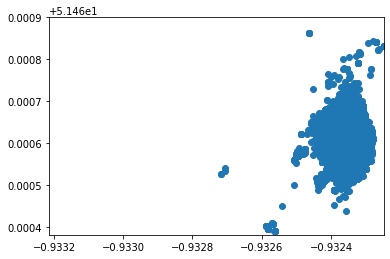

88:66:a5:45:b9:ea
61.78341310161391


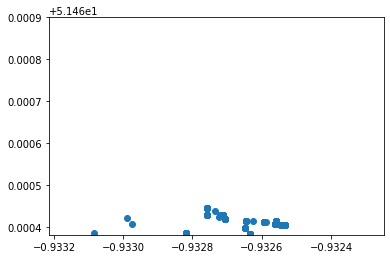

9c:8c:6e:46:01:f8
90.0699114156587


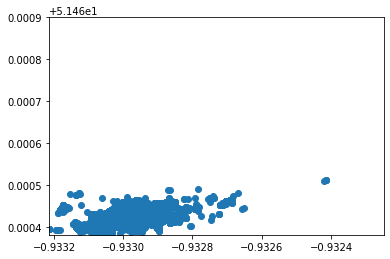

9c:8c:6e:46:0c:52
46.957422680570055


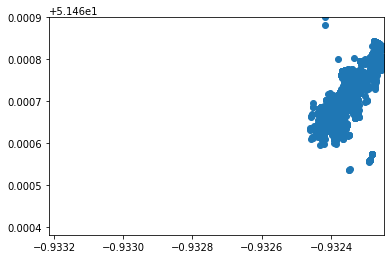

bc:b8:63:9f:29:b4
14.979704431229491


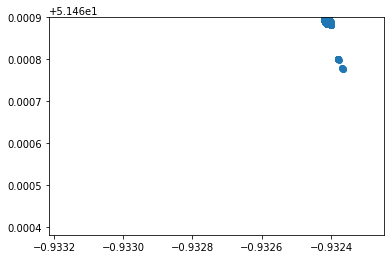

04:d6:aa:88:5d:e1
102.12385593723391


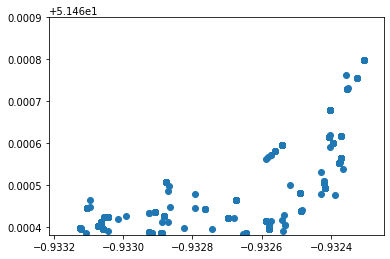

c4:6e:1f:1c:f2:9b
15.75532140576352


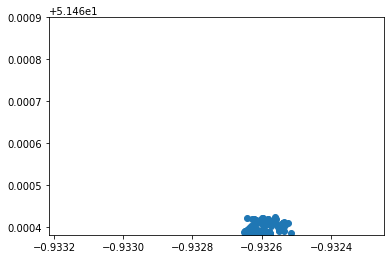

c4:6e:1f:1b:72:40
86.88206816800918


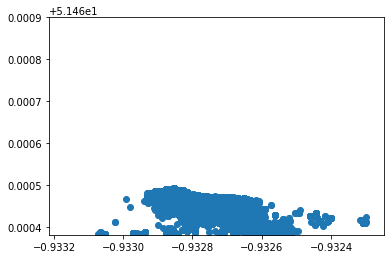

7c:b3:7b:19:5b:e4
11.753388835906687


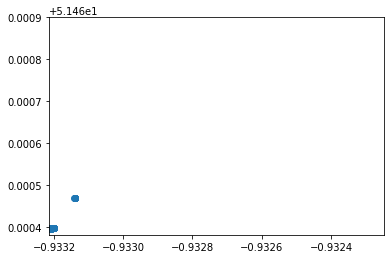

ac:d1:b8:03:40:8f
103.75305977117247


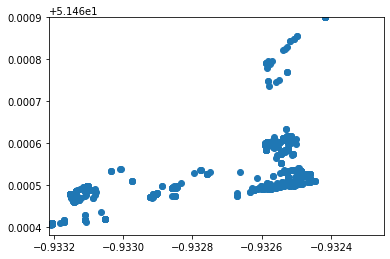

50:de:06:28:65:49
27.470613538667575


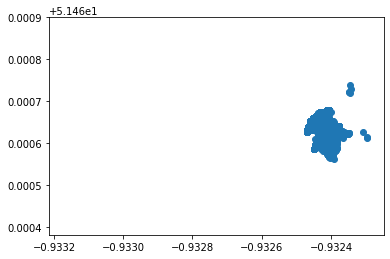

5c:ad:cf:c2:25:b8
63.79302578435381


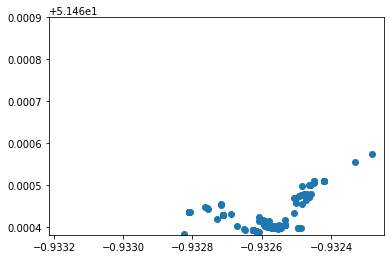

8c:fe:57:80:c3:d3
44.700508574547015


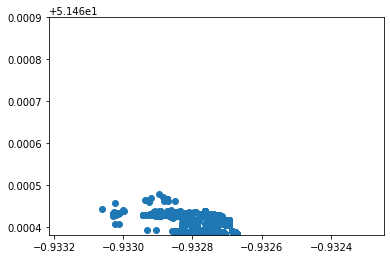

34:e1:2d:c6:a8:59
77.96849373784602


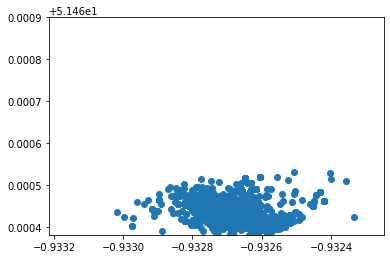

c4:6e:1f:1c:88:e9
74.38599128607397


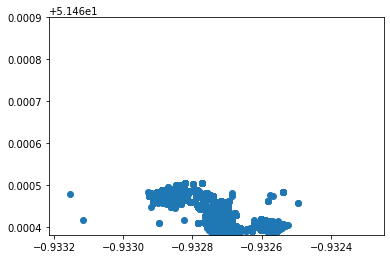

98:84:e3:d8:80:60
29.19740256369782


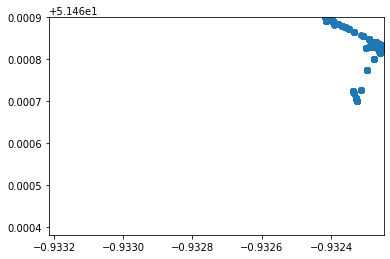

bc:3d:85:c5:9a:ea
0.0


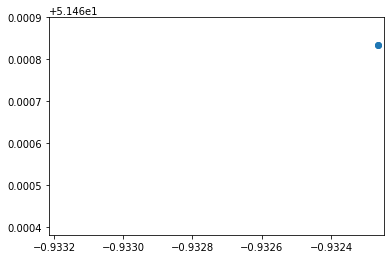

00:0b:82:d0:ff:35
0.0


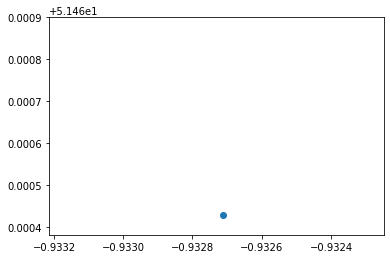

88:9e:33:90:e3:62
10.232524368861178


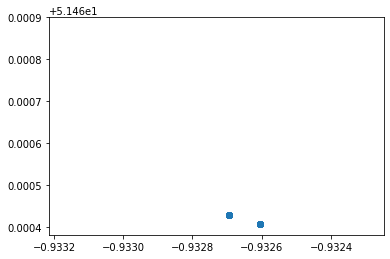

00:25:42:02:15:38
11.689200035496604


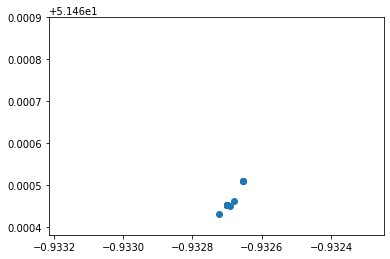

7c:b2:7d:87:76:66
0.0


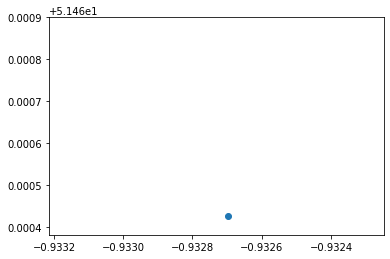

7c:89:56:80:a9:5e
0.0


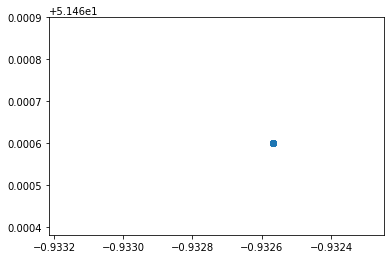

64:6e:69:d9:fc:8b
0.0


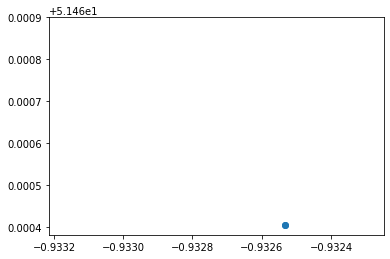

5c:5f:67:8b:fd:4e
113.05310569086339


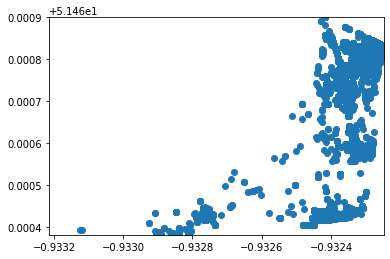

48:a4:72:ae:11:81
18.022622170575705


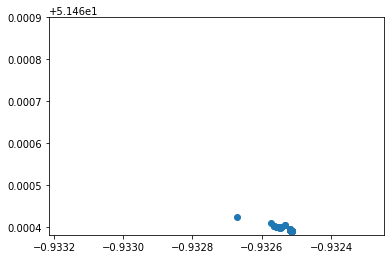

30:07:4d:5e:a6:6c
104.59804849192416


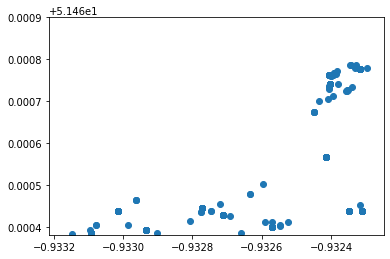

04:ea:56:92:f9:9b
17.850726299316534


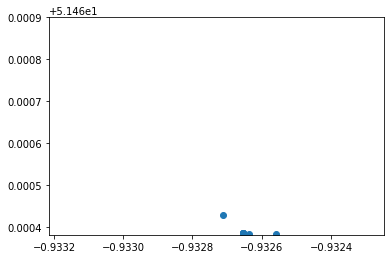

00:c2:c6:ec:4c:a3
6.801407224982012


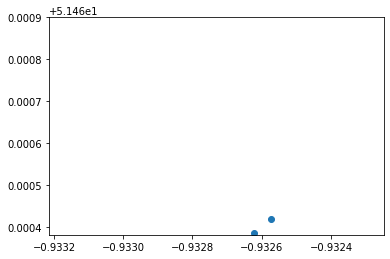

f0:d7:aa:fc:1c:d0
8.084087093875644


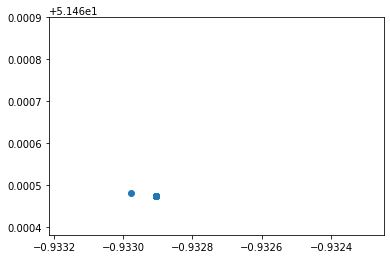

In [27]:
# Distance
weekend_presence = np.array(df_weekend['ClientMacAddr'])
for i in weekend_presence :
    person = df[df['ClientMacAddr'] == i ]
    print(i)
    person_min_lng = min(person['lng'])
    person_max_lng = max(person['lng'])
    person_min_lat = min(person['lat'])
    person_max_lat = max(person['lat'])
    person_distance = 111139 * ((person_max_lng - person_min_lng)**2 + (person_max_lat - person_min_lat)**2)**0.5
    print(person_distance)
    plt.scatter(person['lng'], person['lat'])
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.show()

In [ ]:
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")

In [ ]:
designated_office_lat = [51.46070966937143, 51.46093167542239]
designated_office_lng = [-0.9324487490495494, -0.9322256859342483]

In [50]:
df_office = df.query("lat>=51.46070966937143 and lat<=51.46093167542239")
df_office = df.query("lng>=-0.9324487490495494 and lng<=-0.9322256859342483")
unique_office_mac = df_office["ClientMacAddr"].unique()
len(unique_office_mac)

3360

In [28]:
# Distribution for max distance
temp1 = df.groupby('ClientMacAddr')['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby('ClientMacAddr')['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on='ClientMacAddr')
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp = temp.merge(frequency, on='ClientMacAddr')
temp.sort_values('Distance(Meter)', ascending = False)

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
3112  6c:96:cf:b2:c2:fe  51.460900  51.460381 -0.932248 -0.933215   
2805  48:45:20:37:e8:a3  51.460900  51.460382 -0.932248 -0.933215   
3428  88:66:a5:e2:de:d1  51.460900  51.460382 -0.932248 -0.933215   
2791  48:45:20:37:c0:a3  51.460900  51.460382 -0.932248 -0.933215   
3690  9c:da:3e:7f:8e:10  51.460900  51.460382 -0.932248 -0.933215   
...                 ...        ...        ...       ...       ...   
1620  24:46:c8:96:54:4d  51.460582  51.460582 -0.932283 -0.932283   
1621  24:46:c8:96:55:ee  51.460637  51.460637 -0.932461 -0.932461   
1622  24:46:c8:96:93:65  51.460801  51.460801 -0.932380 -0.932380   
1623  24:46:c8:96:99:5a  51.460637  51.460637 -0.932461 -0.932461   
0     00:0b:82:d0:ff:35  51.460428  51.460428 -0.932713 -0.932713   

      Distance(Meter)  total_day  total_signal  
3112       121.957547          5          9124  
2805       121.955178          5         12960  
3428       121.954804          8         21946  
2791       121.951697          3          6100  
3690       121.950219          9         17925  
...               ...        ...           ...  
1620         0.000000          1            12  
1621         0.000000          1            13  
1622         0.000000          1            13  
1623         0.000000          1            12  
0            0.000000          1             1  

[4296 rows x 8 columns]

In [29]:
# Add Weekdays and Weekend
df_temp = temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})

## Remove outliers: remove ClientMacAddr that has only 1 signal (row)
df_temp = df_temp.loc[df_temp['total_signal'] > 1,:]
df_temp

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
1     00:0c:e7:6b:9f:ac  51.460832  51.460832 -0.932248 -0.932248   
2     00:10:02:36:6f:0d  51.460900  51.460900 -0.932418 -0.932418   
3     00:10:02:4a:d1:1d  51.460473  51.460434 -0.932917 -0.933027   
4     00:10:20:cd:86:91  51.460617  51.460383 -0.932423 -0.932850   
5     00:10:20:ce:df:1d  51.460832  51.460388 -0.932248 -0.933004   
...                 ...        ...        ...       ...       ...   
4291  fc:53:9e:bb:34:15  51.460462  51.460457 -0.933140 -0.933147   
4292  fc:62:b9:5e:cf:b3  51.460900  51.460900 -0.932418 -0.932418   
4293  fc:62:b9:70:33:fa  51.460470  51.460462 -0.932877 -0.932947   
4294  fc:62:b9:70:ef:17  51.460456  51.460428 -0.932681 -0.932713   
4295  fc:62:b9:ba:17:27  51.460837  51.460829 -0.932248 -0.932263   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  
1            0.000000          1            13      1.0      0.0  
2            0.000000          1            13      1.0      0.0  
3           12.981277          1            13      1.0      0.0  
4           54.118381          1            27      1.0      0.0  
5           97.419675          2            37      2.0      0.0  
...               ...        ...           ...      ...      ...  
4291         0.865484          1            13      1.0      0.0  
4292         0.000000          1            13      1.0      0.0  
4293         7.883500          1            13      1.0      0.0  
4294         4.687158          1            11      1.0      0.0  
4295         1.917551          2            27      2.0      0.0  

[4173 rows x 10 columns]

In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4173 entries, 1 to 4295
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientMacAddr    4173 non-null   object 
 1   max_lat          4173 non-null   float64
 2   min_lat          4173 non-null   float64
 3   max_lng          4173 non-null   float64
 4   min_lng          4173 non-null   float64
 5   Distance(Meter)  4173 non-null   float64
 6   total_day        4173 non-null   int64  
 7   total_signal     4173 non-null   int64  
 8   Weekday          4173 non-null   float64
 9   Weekend          4173 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 358.6+ KB


In [77]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-12-19
2020-06-07


array([[<AxesSubplot:title={'center':'Distance(Meter)'}>]], dtype=object)

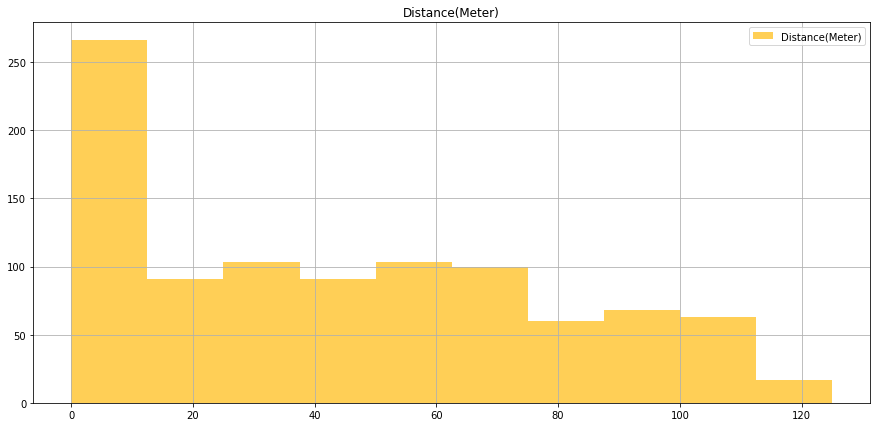

In [78]:
df_temp.hist(column='Distance(Meter)',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

array([[<AxesSubplot:title={'center':'total_day'}>]], dtype=object)

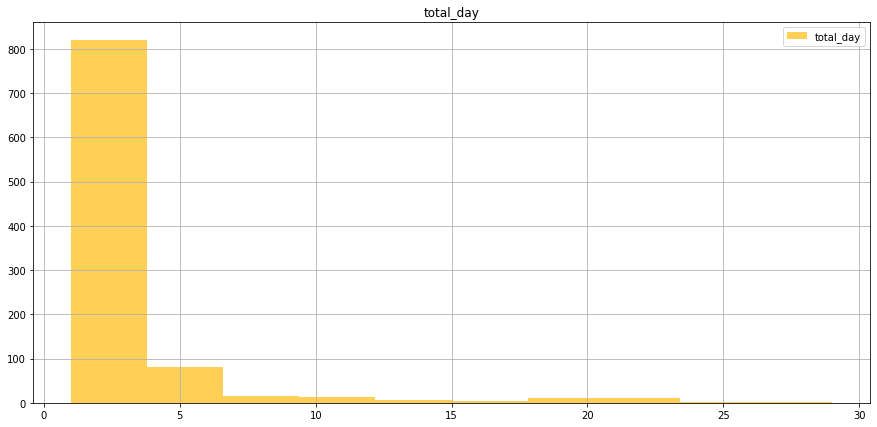

In [79]:
df_temp.hist(column='total_day',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56',
             bins=10)

array([[<AxesSubplot:title={'center':'total_signal'}>]], dtype=object)

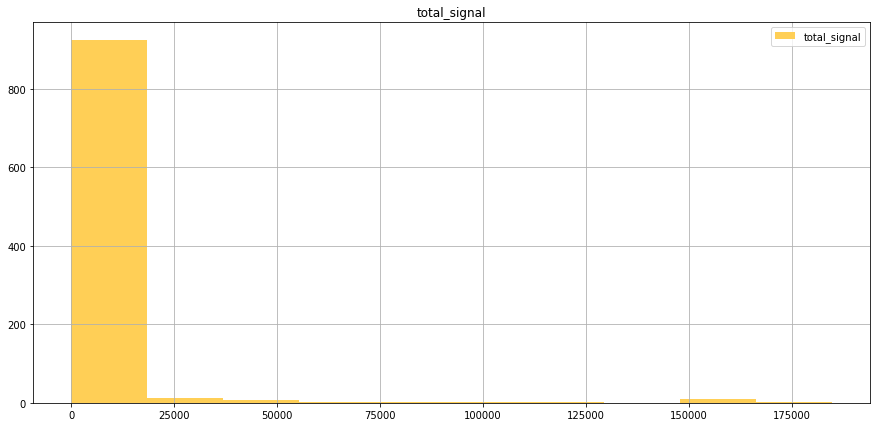

In [80]:
df_temp.hist(column='total_signal',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

In [81]:
df_temp.describe()

max_lat     min_lat     max_lng     min_lng  Distance(Meter)  \
count  962.000000  962.000000  962.000000  962.000000       962.000000   
mean    51.460662   51.460464   -0.932441   -0.932766        43.908285   
std      0.000180    0.000133    0.000242    0.000301        35.307127   
min     51.460383   51.460381   -0.933215   -0.933215         0.000000   
25%     51.460480   51.460383   -0.932559   -0.933064         8.146600   
50%     51.460670   51.460404   -0.932311   -0.932740        40.216465   
75%     51.460832   51.460471   -0.932265   -0.932509        70.568627   
max     51.460938   51.460917   -0.932221   -0.932248       125.026428   

        total_day   total_signal     Weekday     Weekend  
count  962.000000     962.000000  962.000000  962.000000  
mean     2.554054    5320.863825    2.312890    0.241164  
std      3.601319   20072.322372    2.811975    1.090136  
min      1.000000       2.000000    0.000000    0.000000  
25%      1.000000      15.000000    1.000000    0.000000  
50%      1.000000     541.500000    1.000000    0.000000  
75%      3.000000    3335.250000    2.000000    0.000000  
max     29.000000  184766.000000   24.000000    9.000000

## Define the characteristics of Mac ID

Fixed device:
1. Distance < 45 meters
2. Frequency in days >= 5 days / a year
3. Contain data in weekends
4. TODO: Data present whole days
5. TODO: High density: low variance

Mobile device:
1. Distance >= 45 meters 

TODO: 
 - Security guard: 
 1. Night shift
 2. Frequency in days > 5
 3. Contain data in weekend
 - Employee:
 1. Frequency in days > 5
 2. No weekends
 - Visitors:
 1. Frequency in days <= 5
 2. No weekends

In [31]:
# Distribution for max distance
temp1 = df.groupby(['ClientMacAddr', 'date'])['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby(['ClientMacAddr', 'date'])['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on=['ClientMacAddr', 'date'])
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp.sort_values(['ClientMacAddr', 'date', 'Distance(Meter)'], ascending = [True, True, False])

ClientMacAddr        date    max_lat    min_lat   max_lng   min_lng  \
0     00:0b:82:d0:ff:35  2020-02-29  51.460428  51.460428 -0.932713 -0.932713   
1     00:0c:e7:6b:9f:ac  2020-03-03  51.460832  51.460832 -0.932248 -0.932248   
2     00:10:02:36:6f:0d  2019-10-28  51.460900  51.460900 -0.932418 -0.932418   
3     00:10:02:4a:d1:1d  2020-03-02  51.460473  51.460434 -0.932917 -0.933027   
4     00:10:20:cd:86:91  2019-10-24  51.460617  51.460383 -0.932423 -0.932850   
...                 ...         ...        ...        ...       ...       ...   
6917  fc:62:b9:5e:cf:b3  2019-10-28  51.460900  51.460900 -0.932418 -0.932418   
6918  fc:62:b9:70:33:fa  2020-02-27  51.460470  51.460462 -0.932877 -0.932947   
6919  fc:62:b9:70:ef:17  2020-03-03  51.460456  51.460428 -0.932681 -0.932713   
6920  fc:62:b9:ba:17:27  2020-02-27  51.460832  51.460832 -0.932248 -0.932248   
6921  fc:62:b9:ba:17:27  2020-03-03  51.460837  51.460829 -0.932248 -0.932263   

      Distance(Meter)  
0            0.000000  
1            0.000000  
2            0.000000  
3           12.981277  
4           54.118381  
...               ...  
6917         0.000000  
6918         7.883500  
6919         4.687158  
6920         0.000000  
6921         1.917551  

[6922 rows x 7 columns]

In [32]:
temp['ClientMacAddr'].value_counts()

e8:de:27:9f:7f:0c    14
9c:8c:6e:46:01:f8    14
9c:8c:6e:46:0c:52    14
bc:b8:63:9f:29:b4    14
c4:6e:1f:1b:72:40    11
                     ..
24:46:c8:88:4a:e8     1
24:46:c8:88:52:8d     1
24:46:c8:88:6c:86     1
24:46:c8:88:9d:0f     1
24:46:c8:cd:37:18     1
Name: ClientMacAddr, Length: 4296, dtype: int64

In [35]:
# Group by Date and average the distance
df_temp = temp.groupby('ClientMacAddr')['Distance(Meter)'].mean().reset_index()
df_temp

ClientMacAddr  Distance(Meter)
0     00:0b:82:d0:ff:35         0.000000
1     00:0c:e7:6b:9f:ac         0.000000
2     00:10:02:36:6f:0d         0.000000
3     00:10:02:4a:d1:1d        12.981277
4     00:10:20:cd:86:91        54.118381
...                 ...              ...
4291  fc:53:9e:bb:34:15         0.865484
4292  fc:62:b9:5e:cf:b3         0.000000
4293  fc:62:b9:70:33:fa         7.883500
4294  fc:62:b9:70:ef:17         4.687158
4295  fc:62:b9:ba:17:27         0.958775

[4296 rows x 2 columns]

In [36]:
# Define the Job function
df_temp['Mobile_or_fixed'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<10, 'Mobile_or_fixed'] = 'Fixed Device'
df_temp

ClientMacAddr  Distance(Meter) Mobile_or_fixed
0     00:0b:82:d0:ff:35         0.000000    Fixed Device
1     00:0c:e7:6b:9f:ac         0.000000    Fixed Device
2     00:10:02:36:6f:0d         0.000000    Fixed Device
3     00:10:02:4a:d1:1d        12.981277   Mobile Device
4     00:10:20:cd:86:91        54.118381   Mobile Device
...                 ...              ...             ...
4291  fc:53:9e:bb:34:15         0.865484    Fixed Device
4292  fc:62:b9:5e:cf:b3         0.000000    Fixed Device
4293  fc:62:b9:70:33:fa         7.883500    Fixed Device
4294  fc:62:b9:70:ef:17         4.687158    Fixed Device
4295  fc:62:b9:ba:17:27         0.958775    Fixed Device

[4296 rows x 3 columns]

In [37]:
df_temp["Mobile_or_fixed"].value_counts()

Fixed Device     2776
Mobile Device    1520
Name: Mobile_or_fixed, dtype: int64

In [38]:
Fix_device = df_temp[df_temp['Mobile_or_fixed']=='Fixed Device'].sort_values('Distance(Meter)', ascending=False)
Fix_device

ClientMacAddr  Distance(Meter) Mobile_or_fixed
3720  9c:da:3e:7f:a1:9e         9.997747    Fixed Device
1455  24:46:c8:86:3d:c0         9.979365    Fixed Device
3362  88:66:a5:3a:72:71         9.967455    Fixed Device
412   24:46:c8:18:5d:42         9.903457    Fixed Device
215   24:46:c8:03:b1:4d         9.899372    Fixed Device
3420  88:66:a5:a6:51:b0         9.888100    Fixed Device
338   24:46:c8:10:b7:f5         9.843138    Fixed Device
1305  24:46:c8:78:d5:fe         9.838861    Fixed Device
2755  40:83:de:61:7a:b3         9.700899    Fixed Device
2215  24:46:c8:d3:e0:78         9.614447    Fixed Device

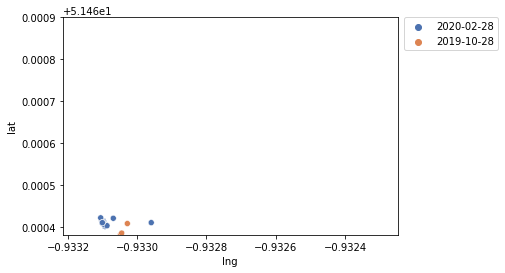

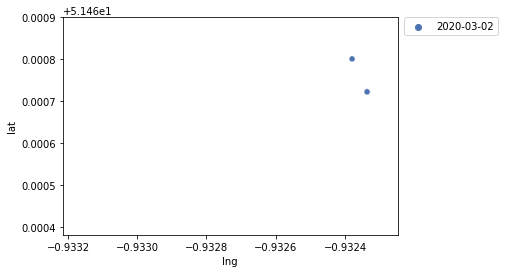

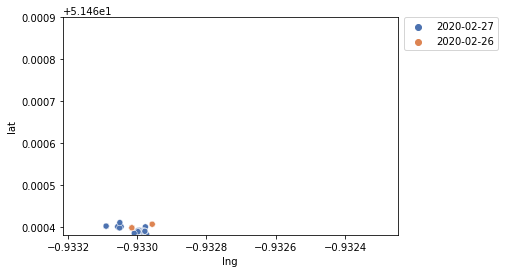

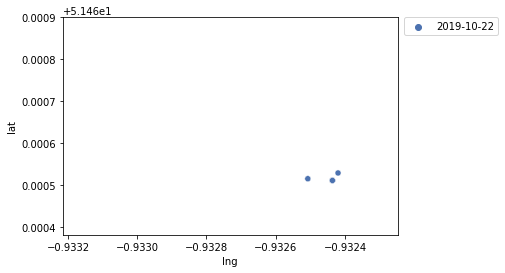

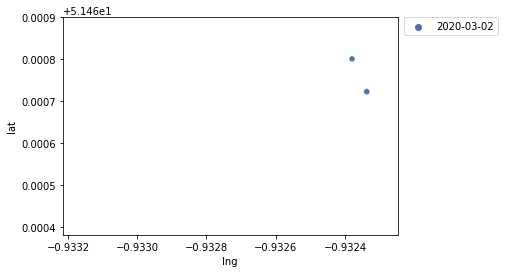

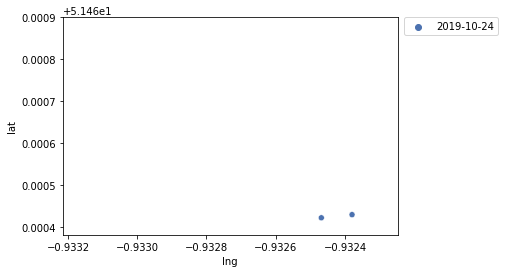

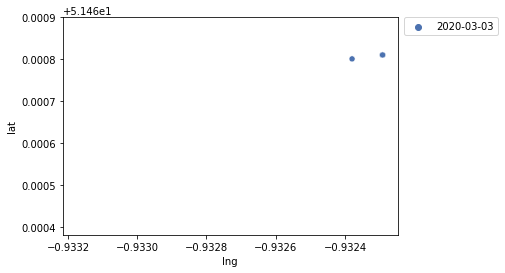

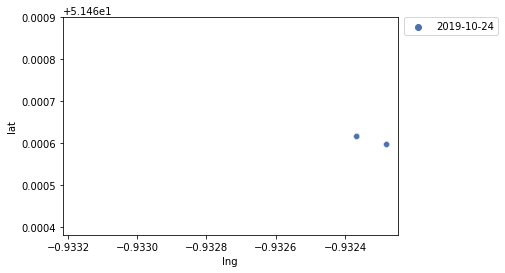

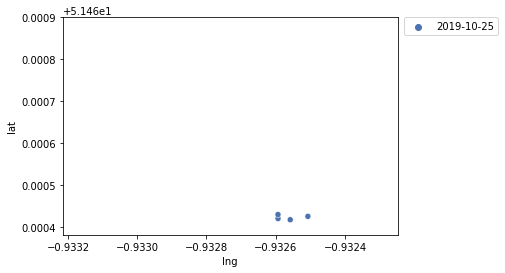

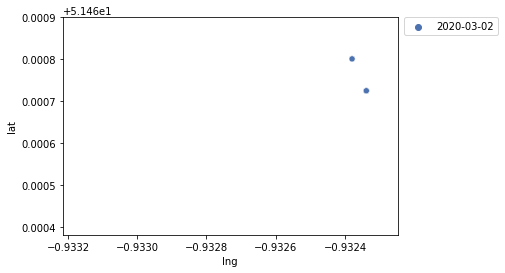

In [49]:
# Assign color for different days
top10_fix = np.array(Fix_device['ClientMacAddr'])
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]

# print(top10_fix)
for i in top10_fix:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [ ]:
51.46086267643394, -0.93233819710921

In [77]:
df_office = df.query("lat>=51.46086267643394 and lat<=51.46093167542239")
df_office = df_office.query("lng>=-0.93233819710921 and lng<=-0.9322256859342483")
unique_office_mac = df_office["ClientMacAddr"].unique()
len(unique_office_mac)

79

In [78]:
len(df['ClientMacAddr'].unique())

4296

In [79]:
Mobile_device = df_temp[df_temp['Mobile_or_fixed']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False)
print(Mobile_device.shape)
Mobile_device.head()


(1520, 3)


ClientMacAddr  Distance(Meter) Mobile_or_fixed
3029  5c:e0:c5:e7:b8:14       121.936763   Mobile Device
3390  88:66:a5:55:a0:4f       121.910268   Mobile Device
3525  90:61:ae:25:a0:c6       121.431764   Mobile Device
4185  e4:a7:a0:99:eb:3e       121.389396   Mobile Device
3425  88:66:a5:da:b0:5a       119.155933   Mobile Device

In [80]:
df_office = df[df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"]) & (df['ClientMacAddr'].isin(unique_office_mac))]
print(len(df_office["ClientMacAddr"].unique()))

78


78


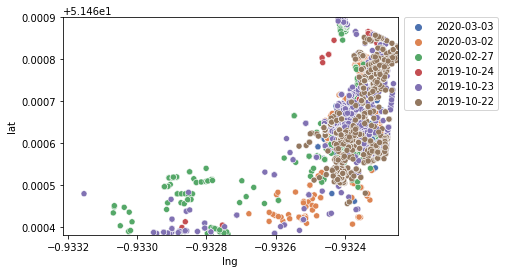

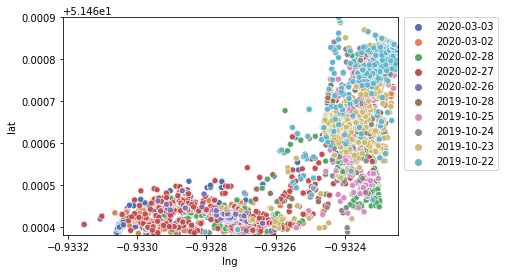

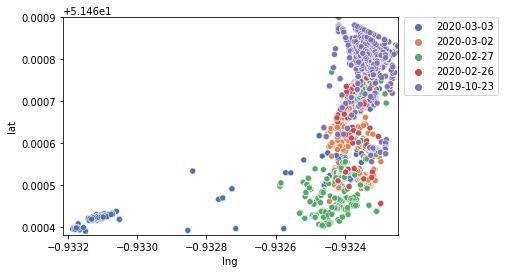

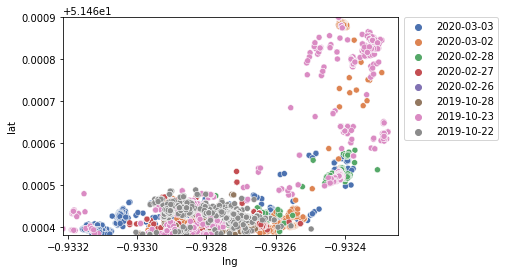

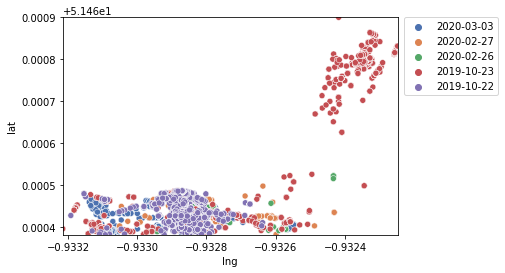

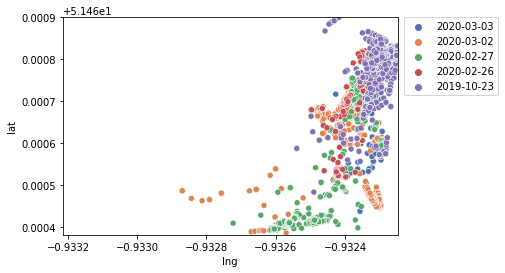

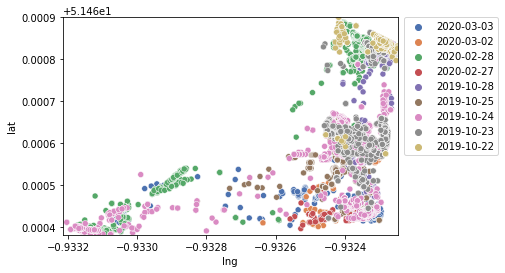

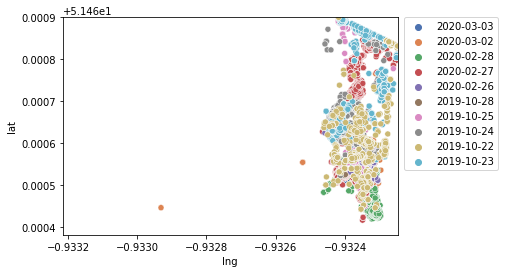

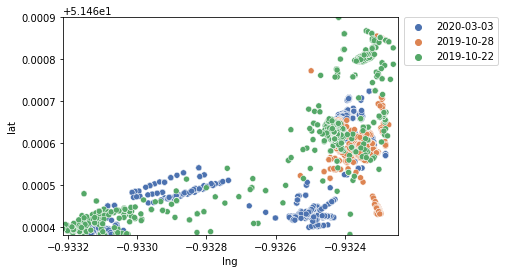

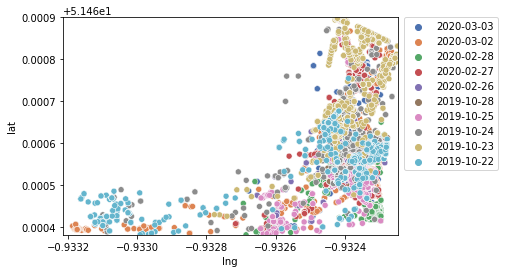

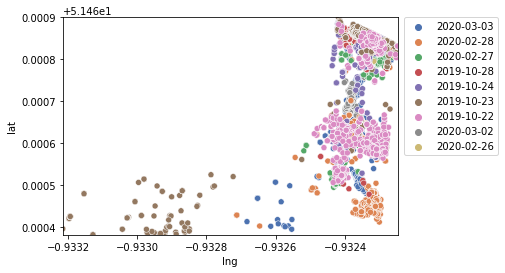

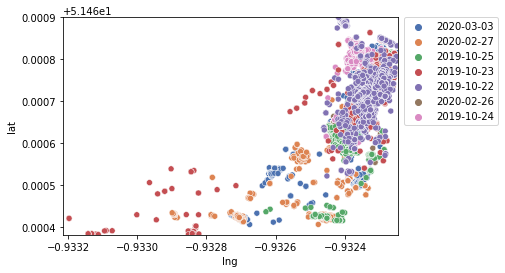

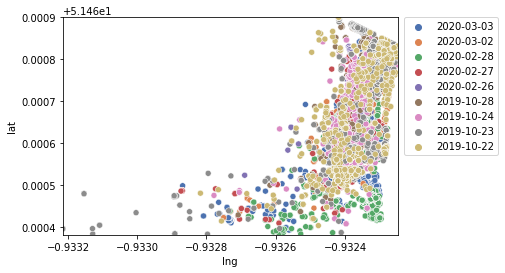

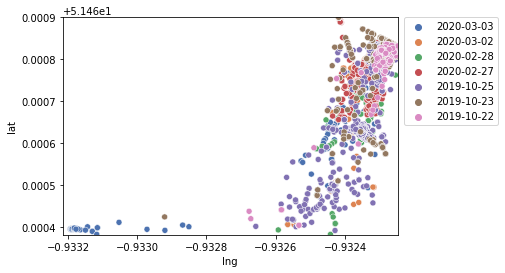

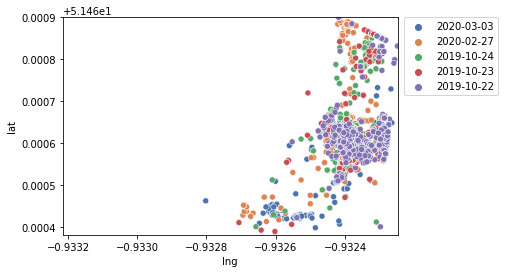

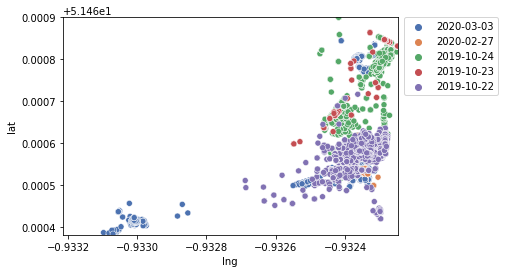

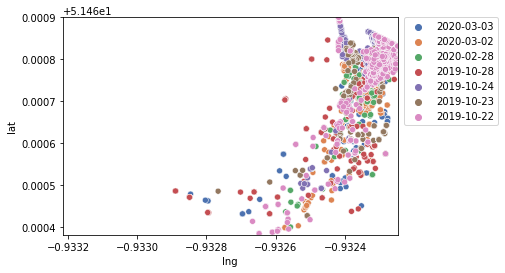

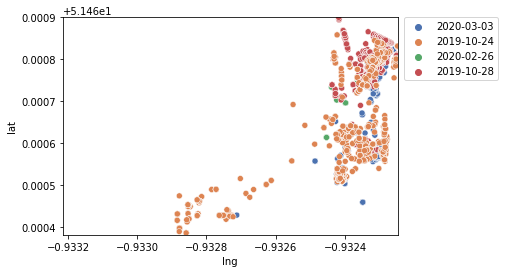

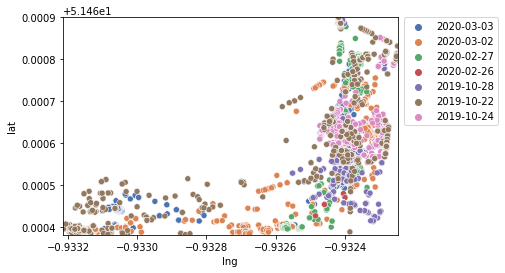

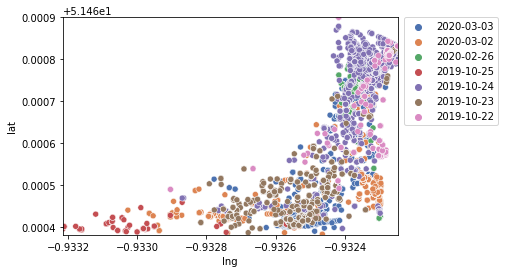

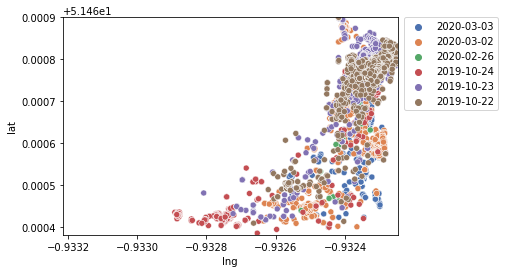

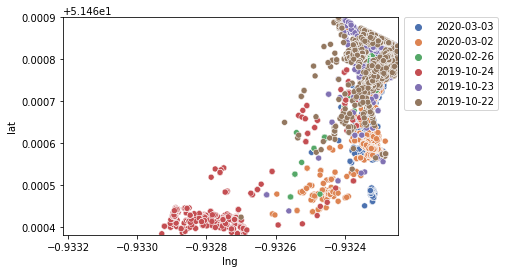

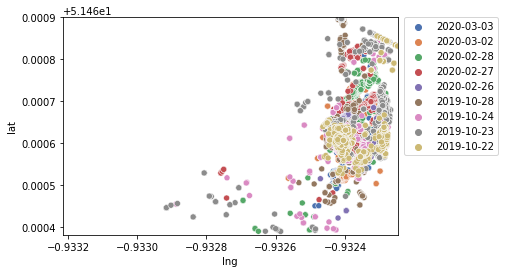

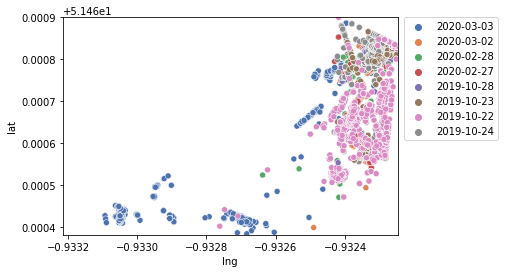

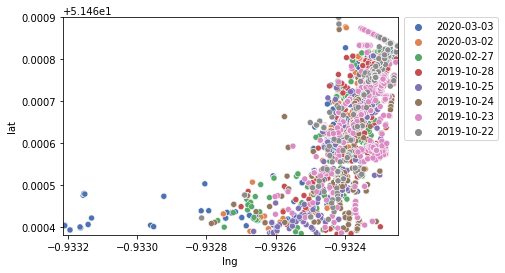

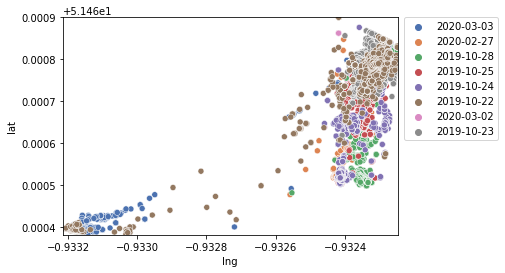

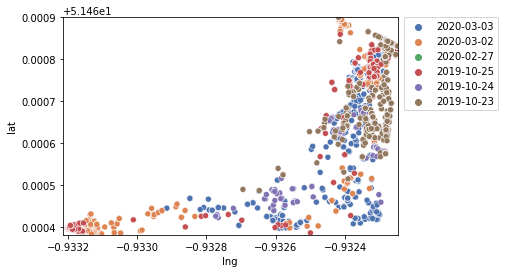

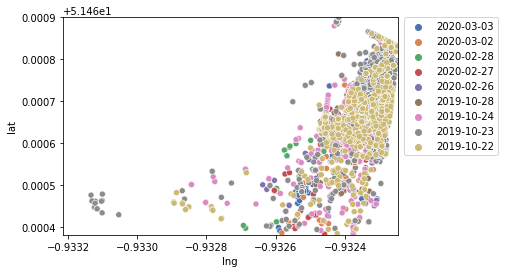

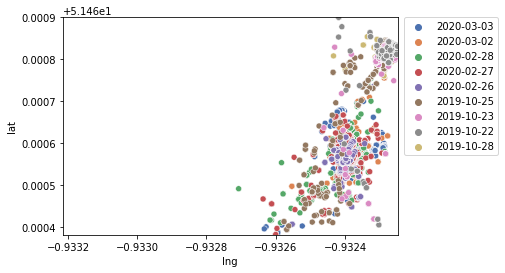

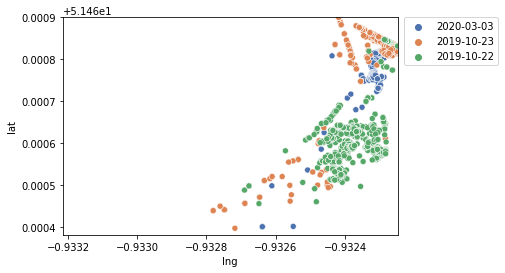

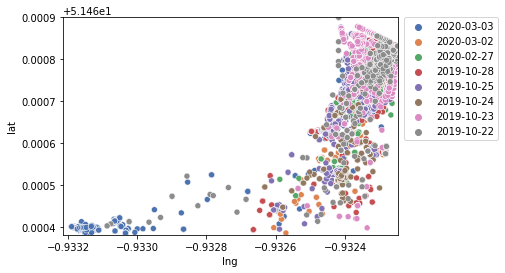

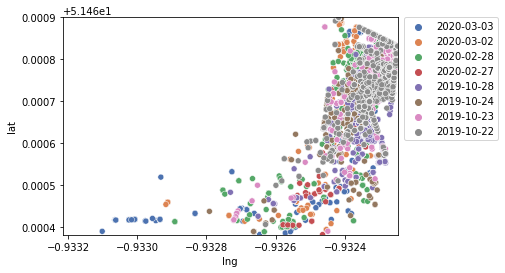

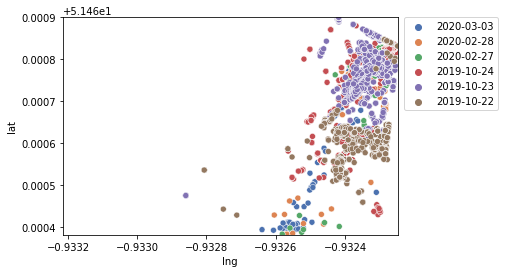

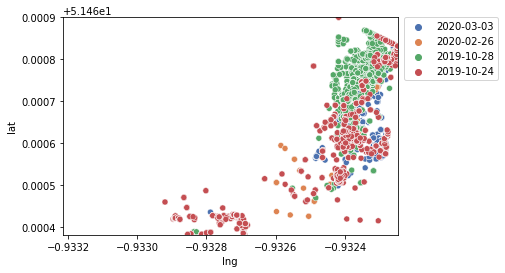

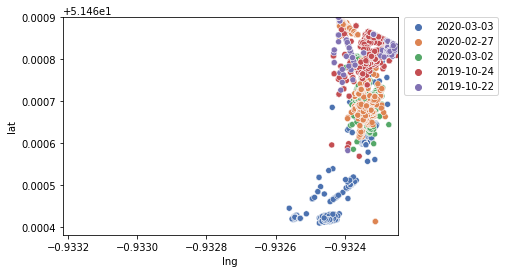

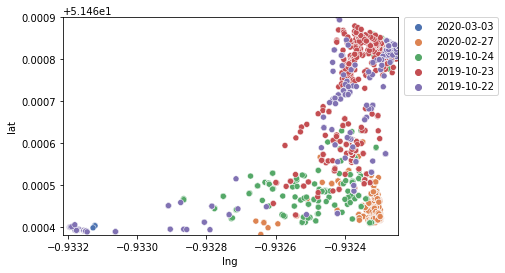

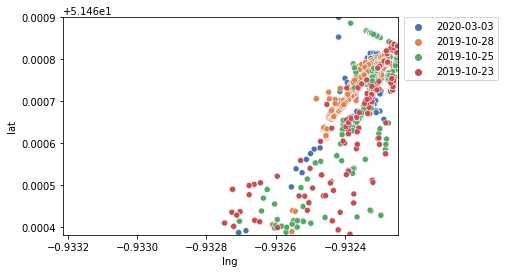

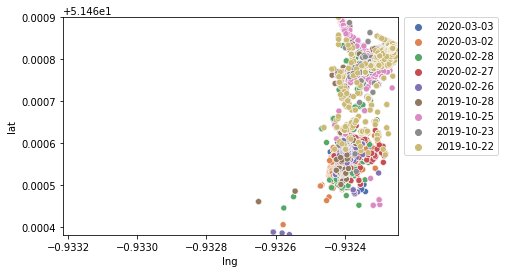

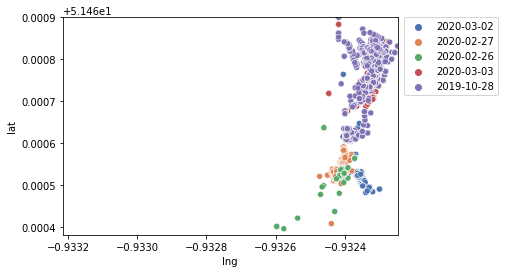

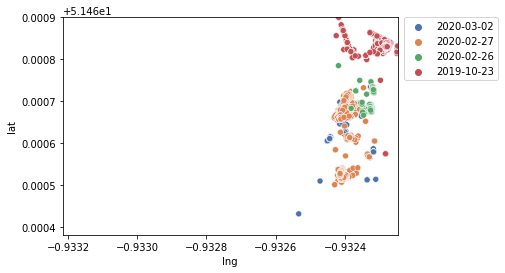

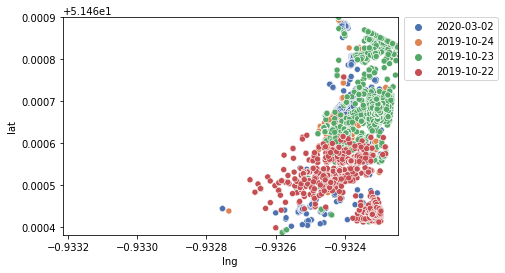

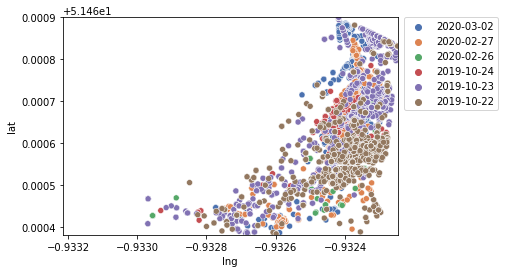

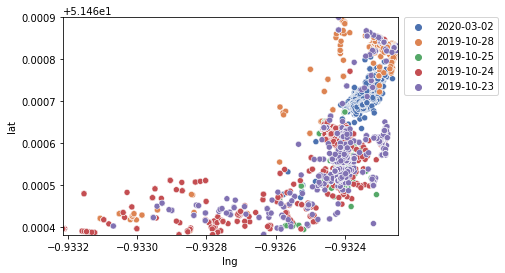

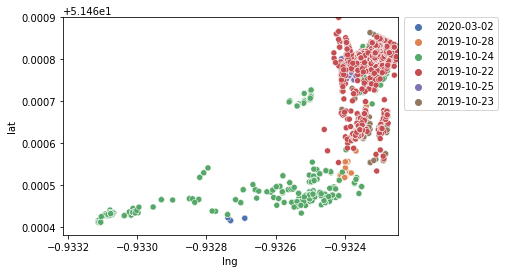

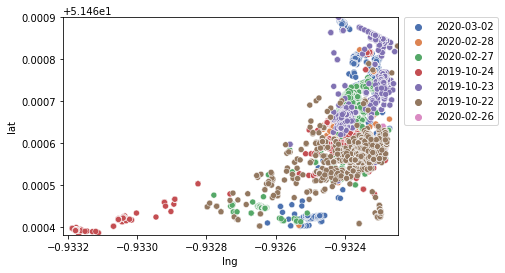

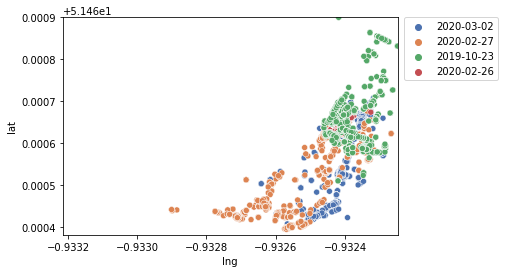

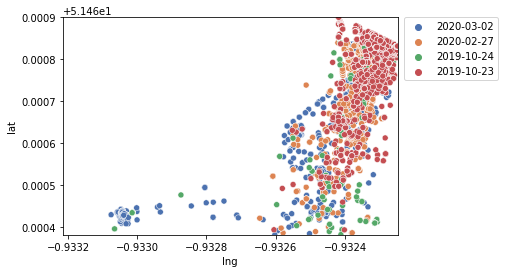

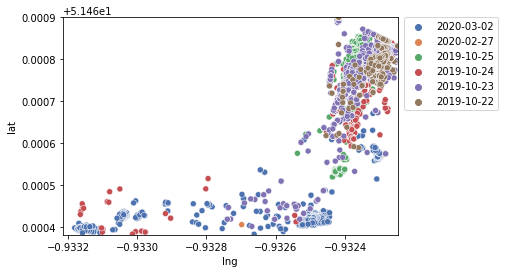

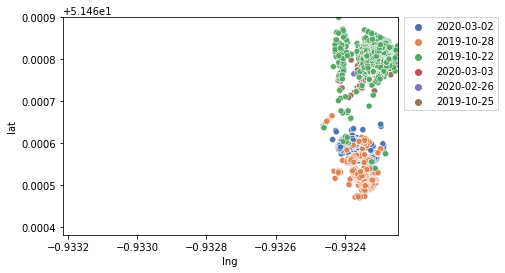

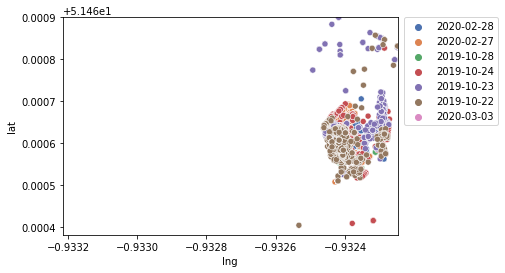

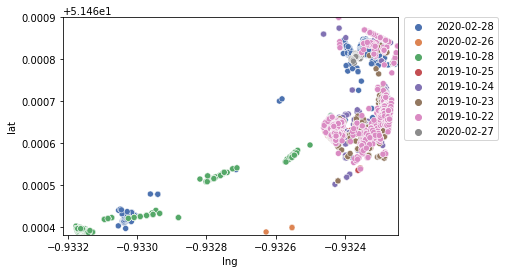

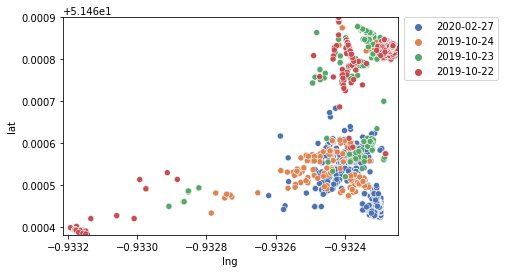

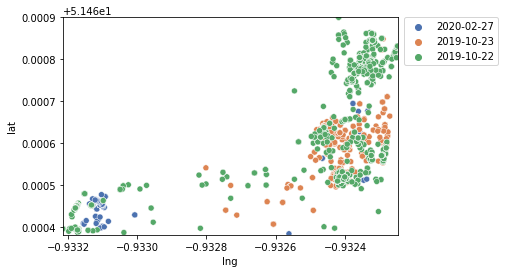

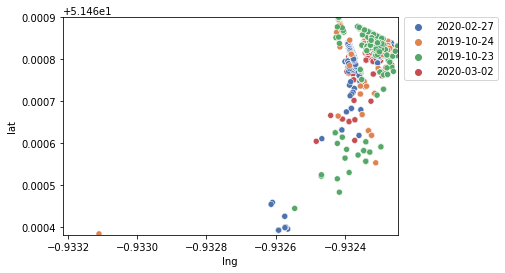

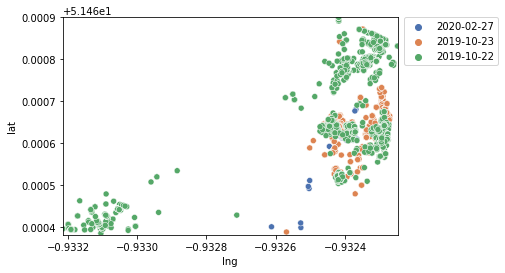

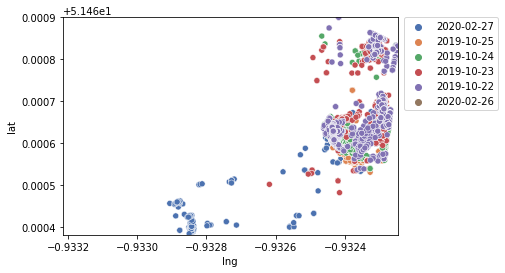

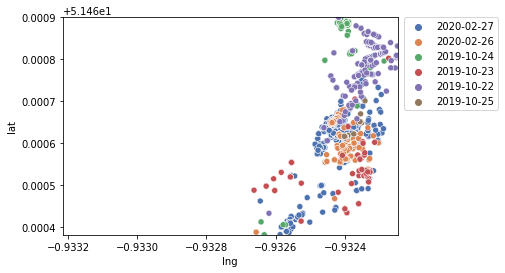

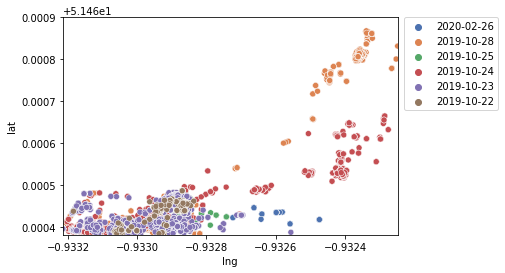

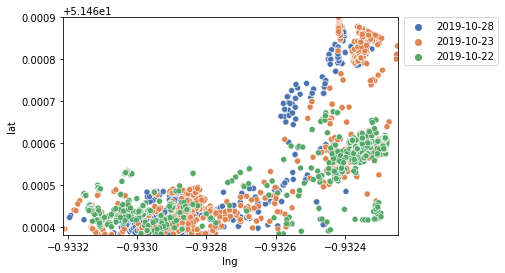

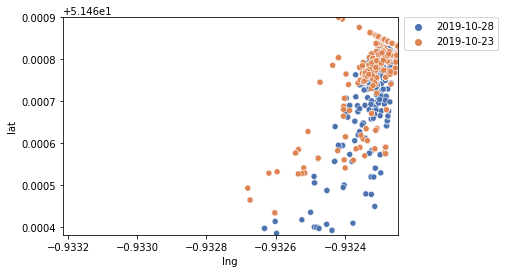

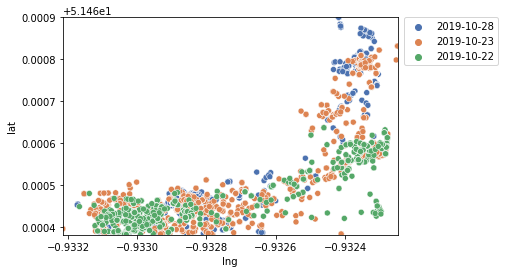

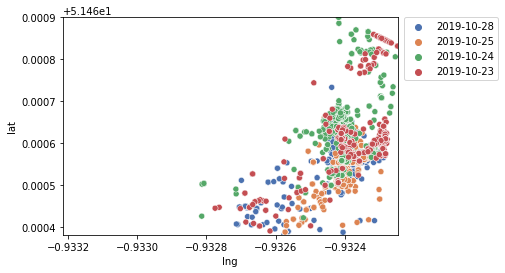

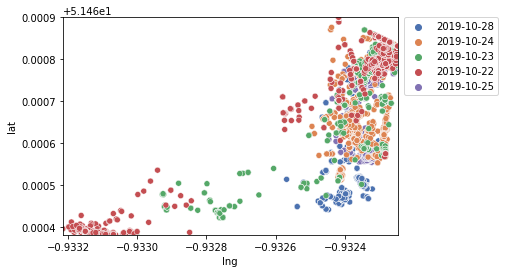

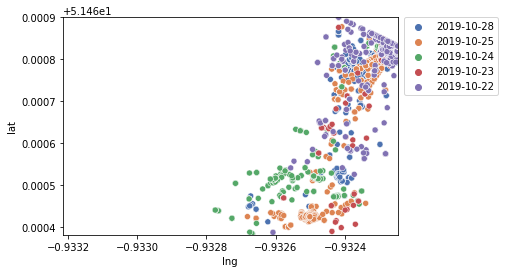

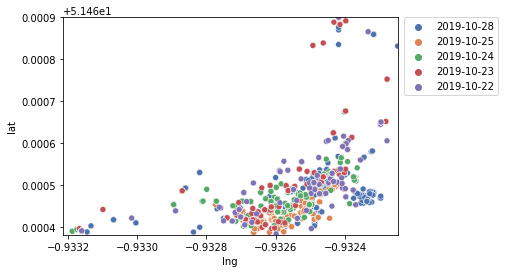

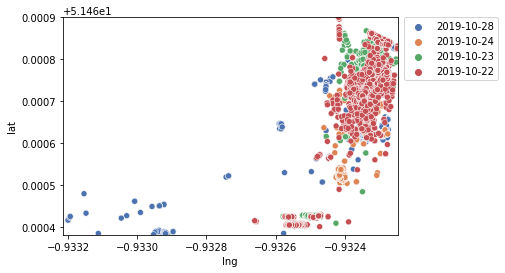

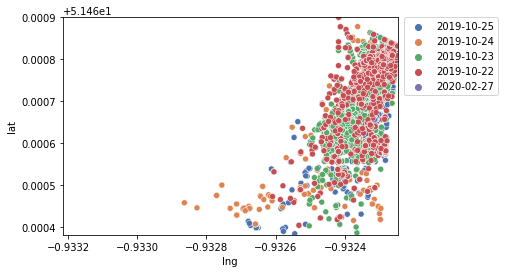

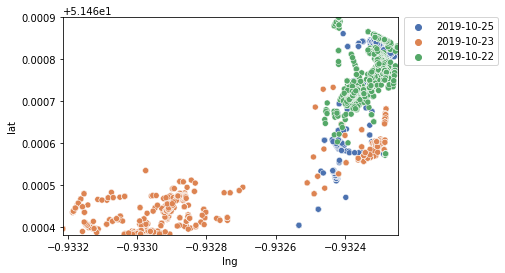

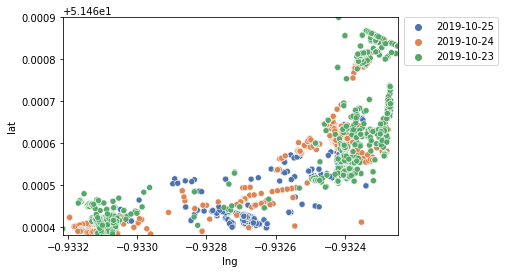

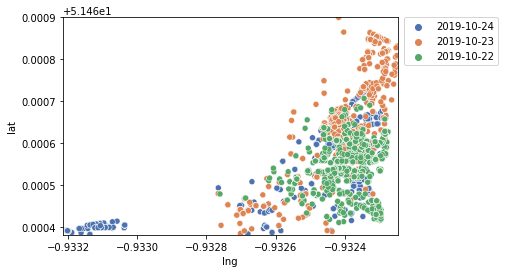

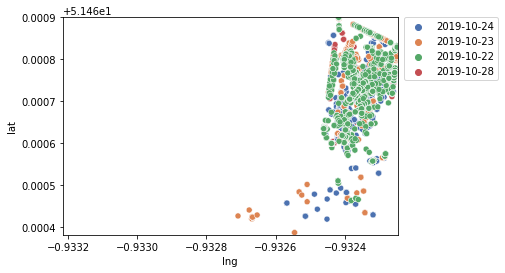

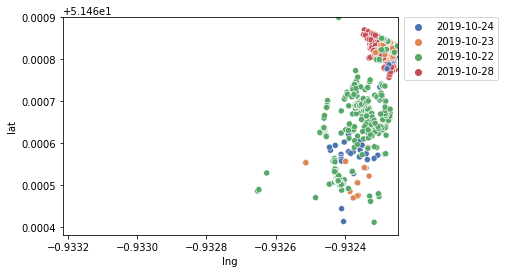

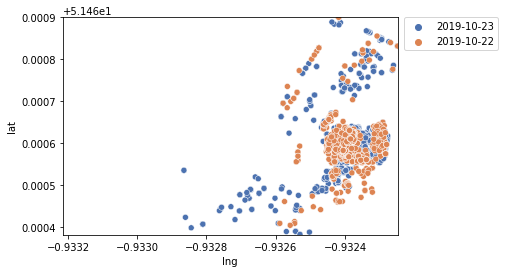

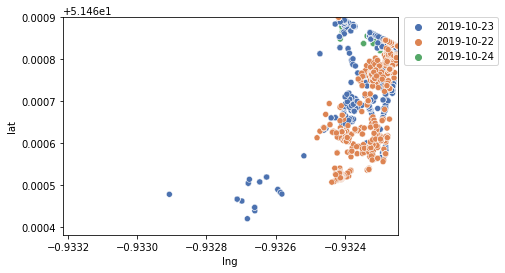

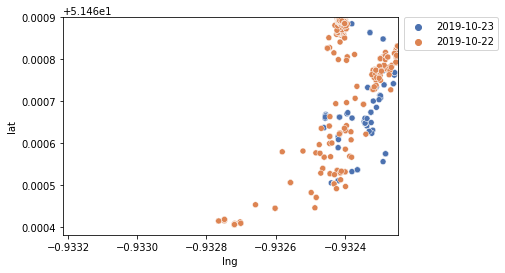

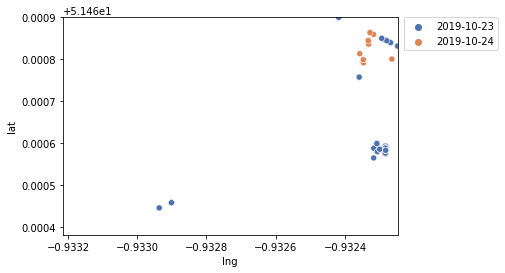

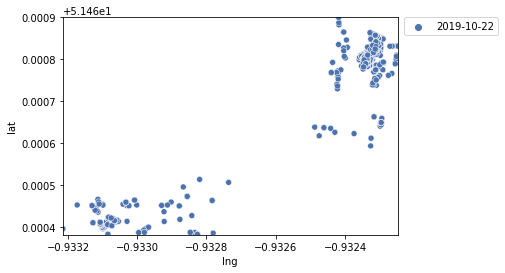

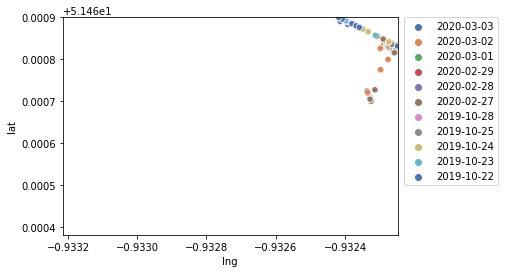

In [82]:
df_office = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['ClientMacAddr'].isin(unique_office_mac)) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
print(len(df_office["ClientMacAddr"].unique()))


for i in df_office["ClientMacAddr"].unique():
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

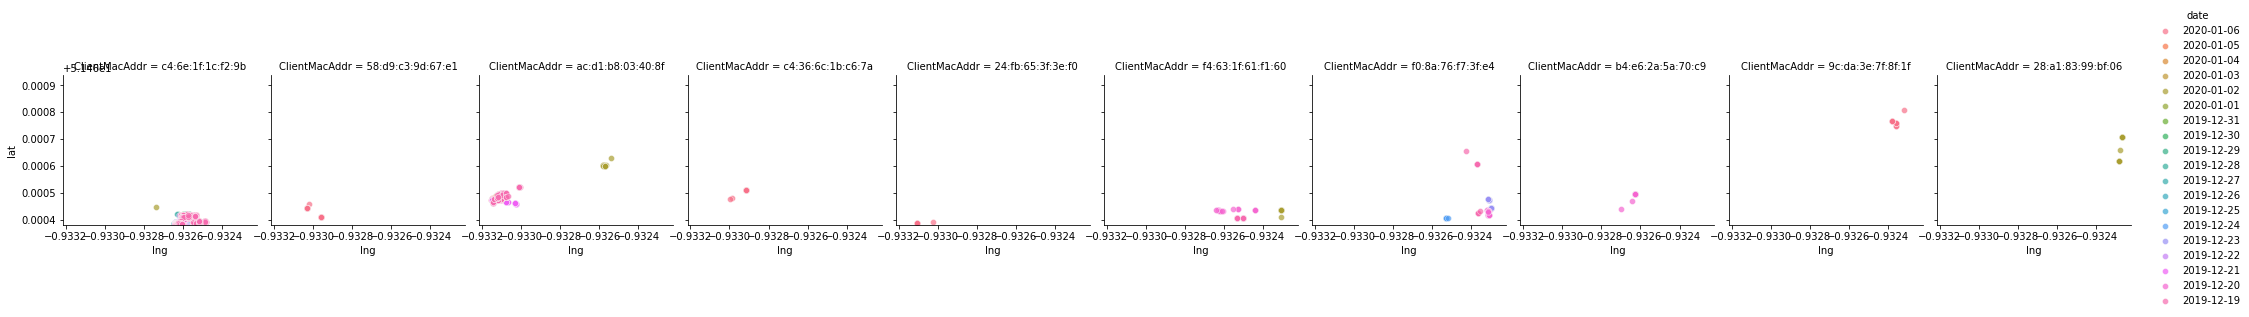

In [101]:

top10_fix = np.array(Fix_device['ClientMacAddr'])
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]
# print(Fix_device_pattern)

# Plot
g = sns.FacetGrid(Fix_device_pattern, col="ClientMacAddr", hue="date")
g.map(sns.scatterplot, "lng", "lat", alpha=.7)
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
g.add_legend()


In [40]:
# Mobile device
Mobile_device = df_temp[df_temp['Mobile_or_fixed']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False)
Mobile_device

ClientMacAddr  Distance(Meter) Mobile_or_fixed
3029  5c:e0:c5:e7:b8:14       121.936763   Mobile Device
3390  88:66:a5:55:a0:4f       121.910268   Mobile Device
3525  90:61:ae:25:a0:c6       121.431764   Mobile Device
4185  e4:a7:a0:99:eb:3e       121.389396   Mobile Device
3425  88:66:a5:da:b0:5a       119.155933   Mobile Device
3033  5c:e0:c5:e7:ce:80       118.817291   Mobile Device
3569  98:10:e8:07:b4:50       118.488120   Mobile Device
3870  b4:9c:df:15:93:86       117.922806   Mobile Device
3289  88:66:a5:0d:26:88       113.856386   Mobile Device
3106  6c:96:cf:8a:14:b1       113.556217   Mobile Device

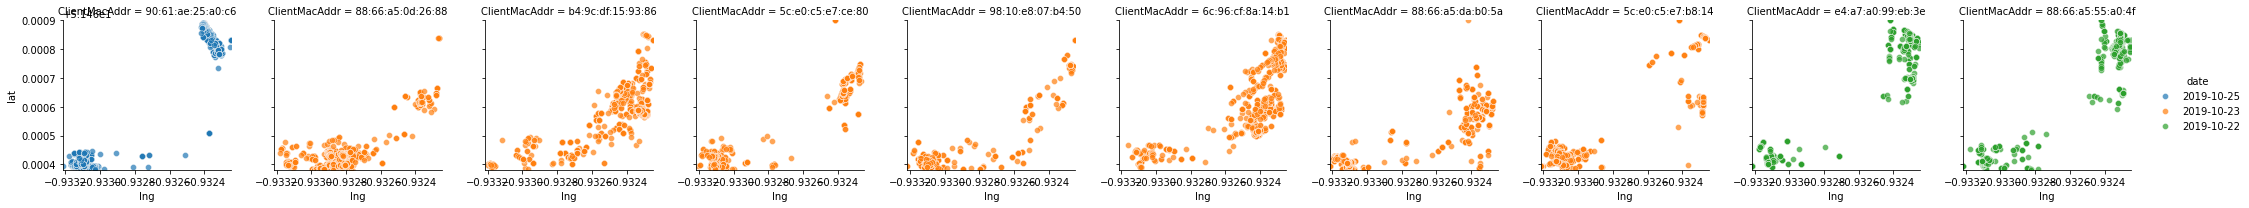

In [41]:

top10_mobile = np.array(Mobile_device['ClientMacAddr'])
# Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_mobile)]
# print(Fix_device_pattern)

# Plot
g = sns.FacetGrid(df[df['ClientMacAddr'].isin(top10_mobile)], col="ClientMacAddr", hue="date")
g.map(sns.scatterplot, "lng", "lat", alpha=.7)
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
g.add_legend()


In [43]:
population = np.random.rand(100)
Area = np.random.randint(100,600,100)
continent =['North America','Europe', 'Asia', 'Australia']*25

test = pd.DataFrame(dict(population=population, Area=Area, continent = continent))


/Users/khaninsi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


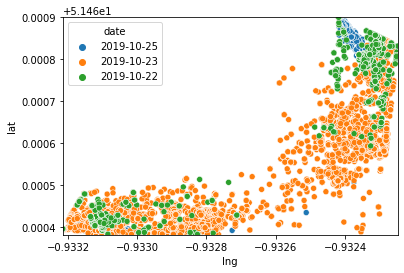

/Users/khaninsi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


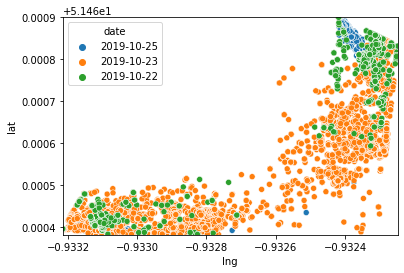

In [46]:
sns.scatterplot('lng', 'lat', data=df[df['ClientMacAddr'].isin(top10_mobile)], hue='date')
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.show()

sns.scatterplot('lng', 'lat', data=df[df['ClientMacAddr'].isin(top10_mobile)], hue='date')
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.show()

In [42]:
# # Assign color for different days
# top10_mobile = np.array(Mobile_device['ClientMacAddr'])
# Mobile_device_pattern = df[df['ClientMacAddr'].isin(top10_mobile)]

# # print(top10_fix)
# import seaborn as sns
# for i in Mobile_device_pattern:
#     person = df[df['ClientMacAddr'] == i]
#     sns.scatterplot(x="lng", y="lat", data=df, hue="date", palette="deep")
#     plt.xlim([min_lng, max_lng])
#     plt.ylim([min_lat, max_lat])
#     plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

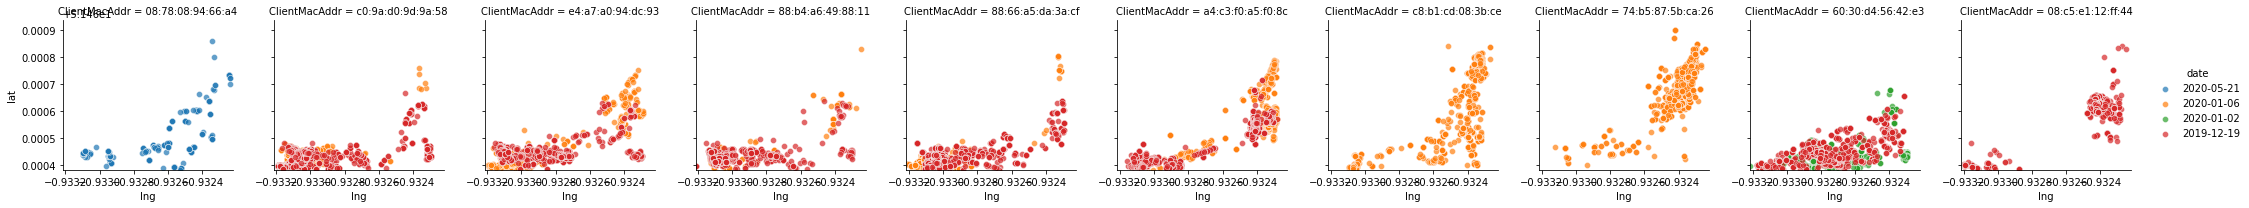

In [104]:

top10_mobile = np.array(Mobile_device['ClientMacAddr'])
Mobile_device_pattern = df[df['ClientMacAddr'].isin(top10_mobile)]
# print(Fix_device_pattern)

# Plot
g = sns.FacetGrid(Mobile_device_pattern, col="ClientMacAddr", hue="date")
g.map(sns.scatterplot, "lng", "lat", alpha=.7)
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
g.add_legend()

In [105]:
# Add total day and signal
df_temp = df_temp.merge(frequency, on='ClientMacAddr')
df_temp

ClientMacAddr  Distance(Meter)   Job function  total_day_x  \
0    00:08:22:08:4c:fc         1.933000   Fixed Device            1   
1    00:08:22:38:bd:fb        15.587516  Mobile Device            1   
2    00:08:22:78:b9:fb         6.581590   Fixed Device            1   
3    00:08:22:9e:65:fc         0.000000   Fixed Device            1   
4    00:08:22:e0:ba:fb        17.159011  Mobile Device            1   
..                 ...              ...            ...          ...   
988  f8:87:f1:ea:3e:21         1.842720   Fixed Device            1   
989  f8:c3:9e:8a:cc:52         0.000000   Fixed Device            1   
990  f8:ff:c2:8e:48:d9        11.669967  Mobile Device            3   
991  fc:03:9f:07:af:f4        18.127950  Mobile Device           22   
992  fc:4d:d4:55:31:b4         2.228693   Fixed Device            3   

     total_signal_x  Weekday  Weekend  total_day_y  total_signal_y  
0                 3      1.0      0.0            1               3  
1                26      1.0      0.0            1              26  
2                40      1.0      0.0            1              40  
3                 1      1.0      0.0            1               1  
4                54      1.0      0.0            1              54  
..              ...      ...      ...          ...             ...  
988               3      1.0      0.0            1               3  
989               1      1.0      0.0            1               1  
990             258      3.0      0.0            3             258  
991          184766     15.0      7.0           22          184766  
992              63      3.0      0.0            3              63  

[993 rows x 9 columns]

In [106]:
# Add Weekdays and Weekend
df_temp = df_temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})
df_temp

ClientMacAddr  Distance(Meter)   Job function  total_day_x  \
0    00:08:22:08:4c:fc         1.933000   Fixed Device            1   
1    00:08:22:38:bd:fb        15.587516  Mobile Device            1   
2    00:08:22:78:b9:fb         6.581590   Fixed Device            1   
3    00:08:22:9e:65:fc         0.000000   Fixed Device            1   
4    00:08:22:e0:ba:fb        17.159011  Mobile Device            1   
..                 ...              ...            ...          ...   
988  f8:87:f1:ea:3e:21         1.842720   Fixed Device            1   
989  f8:c3:9e:8a:cc:52         0.000000   Fixed Device            1   
990  f8:ff:c2:8e:48:d9        11.669967  Mobile Device            3   
991  fc:03:9f:07:af:f4        18.127950  Mobile Device           22   
992  fc:4d:d4:55:31:b4         2.228693   Fixed Device            3   

     total_signal_x  Weekday  Weekend  total_day_y  total_signal_y  Weekday  \
0                 3      1.0      0.0            1               3      1.0   
1                26      1.0      0.0            1              26      1.0   
2                40      1.0      0.0            1              40      1.0   
3                 1      1.0      0.0            1               1      1.0   
4                54      1.0      0.0            1              54      1.0   
..              ...      ...      ...          ...             ...      ...   
988               3      1.0      0.0            1               3      1.0   
989               1      1.0      0.0            1               1      1.0   
990             258      3.0      0.0            3             258      3.0   
991          184766     15.0      7.0           22          184766     15.0   
992              63      3.0      0.0            3              63      3.0   

     Weekend  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
988      0.0  
989      0.0  
990      0.0  
991      7.0  
992      0.0  

[993 rows x 11 columns]

In [107]:
# Define the Job function
df_temp['Job function'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<10, 'Job function'] = 'Fixed Device'
df_temp

ClientMacAddr  Distance(Meter)   Job function  total_day_x  \
0    00:08:22:08:4c:fc         1.933000   Fixed Device            1   
1    00:08:22:38:bd:fb        15.587516  Mobile Device            1   
2    00:08:22:78:b9:fb         6.581590   Fixed Device            1   
3    00:08:22:9e:65:fc         0.000000   Fixed Device            1   
4    00:08:22:e0:ba:fb        17.159011  Mobile Device            1   
..                 ...              ...            ...          ...   
988  f8:87:f1:ea:3e:21         1.842720   Fixed Device            1   
989  f8:c3:9e:8a:cc:52         0.000000   Fixed Device            1   
990  f8:ff:c2:8e:48:d9        11.669967  Mobile Device            3   
991  fc:03:9f:07:af:f4        18.127950  Mobile Device           22   
992  fc:4d:d4:55:31:b4         2.228693   Fixed Device            3   

     total_signal_x  Weekday  Weekend  total_day_y  total_signal_y  Weekday  \
0                 3      1.0      0.0            1               3      1.0   
1                26      1.0      0.0            1              26      1.0   
2                40      1.0      0.0            1              40      1.0   
3                 1      1.0      0.0            1               1      1.0   
4                54      1.0      0.0            1              54      1.0   
..              ...      ...      ...          ...             ...      ...   
988               3      1.0      0.0            1               3      1.0   
989               1      1.0      0.0            1               1      1.0   
990             258      3.0      0.0            3             258      3.0   
991          184766     15.0      7.0           22          184766     15.0   
992              63      3.0      0.0            3              63      3.0   

     Weekend  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
988      0.0  
989      0.0  
990      0.0  
991      7.0  
992      0.0  

[993 rows x 11 columns]

In [108]:
df_temp['Job function'].value_counts()

Mobile Device    678
Fixed Device     315
Name: Job function, dtype: int64

/Users/khaninsi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distance(Meter)', ylabel='Density'>

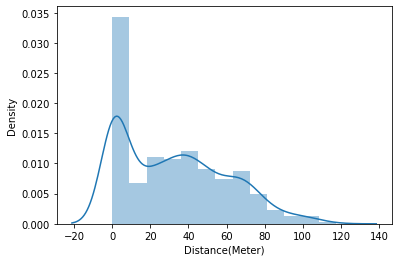

In [109]:
# Distribution of distance
import seaborn as sns
sns.distplot(df_temp['Distance(Meter)'])

In [110]:
sns.distplot(df_temp['total_day'])

KeyError: 'total_day'

In [ ]:
sns.distplot(df_temp['total_signal'])